In [1]:
import os
import numpy as np
import re
import pickle
import pandas as pd
import random
import csv
import scanpy as sc
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

/home/yipingzou2/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## ablation study

covid_GSE247488, PRJNA890633, vaccination_GSE244297

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from scipy.stats import ttest_ind

def get_significance_stars(p_value):
    """Convert p-value to significance stars"""
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return "ns"

def add_significance_bracket_bar(ax, x1, x2, y, p_value, height_offset=0.01):
    """Add significance bracket between two bars"""
    stars = get_significance_stars(p_value)
    if stars == "ns":
        return
    
    # Draw horizontal line
    ax.plot([x1, x2], [y, y], 'k-', linewidth=1)
    # Draw vertical lines
    ax.plot([x1, x1], [y, y-height_offset], 'k-', linewidth=1)
    ax.plot([x2, x2], [y, y-height_offset], 'k-', linewidth=1)
    # Add stars
    ax.text((x1 + x2) / 2, y + 0.005, stars, ha='center', va='bottom', fontsize=12, fontweight='bold')



[[0.405651632122756, 0.42846665339236195], [0.4134704941, 0.42257252050000005], [0.1831242748, 0.2023585638]]


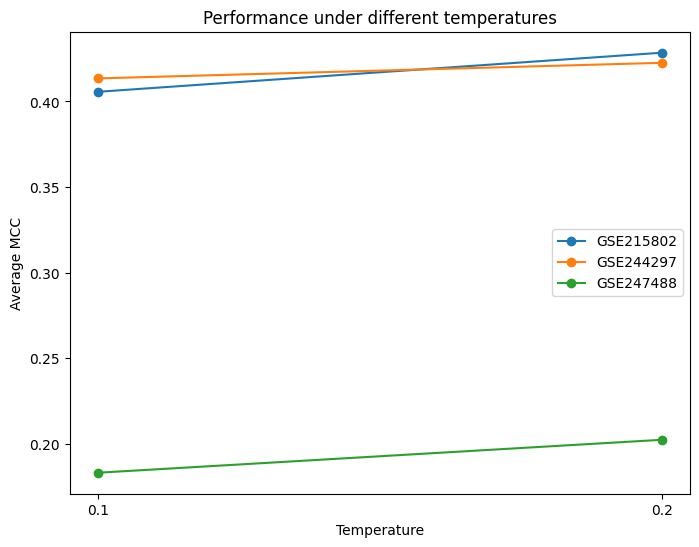

In [56]:
datapath = "/mnt/d/unifiedBCR/benchmark/assess/results"
datasets = ["PRJNA890633", "vaccination_GSE244297", "covid_GSE247488"] 
filenames = ['abalation_bcr_spike_final.csv', 'uniBCR_clonotype_mean_bcr_spike_final.csv']
data = []
for dataset in datasets:
    results = []
    for filename in filenames:
        result = pd.read_csv(os.path.join(datapath, dataset, filename)).MCC.values[:10]
        results.append(result.mean())
        #sns.boxplot(results, fliersize=0)
    data.append(results)


datasets = ["GSE215802", "GSE244297", "GSE247488"] #"vaccination_GSE244297"]
# X-axis values (for simplicity, we'll use 1, 2, 3 for all datasets)
x_values = [0.1, 0.2]
    
# Create the plot
plt.figure(figsize=(8, 6))
print(data)
# Plot each dataset
for i, dataset in enumerate(data):
    plt.plot(
        x_values, dataset, 
        marker="o",  # Highlight points with "o"
        label=datasets[i],  # Use dataset name as label
        linestyle="-",  # Optional: Line style
    )

# Add labels, title, and legend
plt.xlabel("Temperature")
plt.xticks([0.1, 0.2])
plt.ylabel("Average MCC")
plt.title("Performance under different temperatures")
plt.legend()  
plt.savefig("/mnt/d/unifiedBCR/figures/classification/ablation/BCRs.pdf", dpi=100, bbox_inches='tight')    

[[0.2215185936, 0.38149317407466404], [0.5034917009, 0.5574791338], [0.22644461610000005, 0.2730156417542234]]


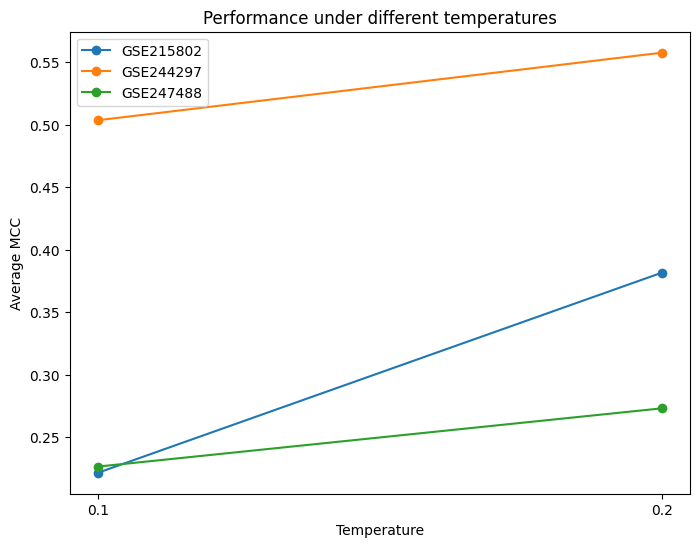

In [57]:
datapath = "/mnt/d/unifiedBCR/benchmark/assess/results"
datasets = ["PRJNA890633", "vaccination_GSE244297", "covid_GSE247488"] 
filenames = ['abalation_gex_spike.csv', 'uniBCR_clonotype_mean_gex_spike.csv']
data = []
for dataset in datasets:
    results = []
    for filename in filenames:
        result = pd.read_csv(os.path.join(datapath, dataset, filename)).MCC.values[:10]
        results.append(result.mean())
        #sns.boxplot(results, fliersize=0)
    data.append(results)


datasets = ["GSE215802", "GSE244297", "GSE247488"] #"vaccination_GSE244297"]
# X-axis values (for simplicity, we'll use 1, 2, 3 for all datasets)
x_values = [0.1, 0.2]
    
# Create the plot
plt.figure(figsize=(8, 6))
print(data)
# Plot each dataset
for i, dataset in enumerate(data):
    plt.plot(
        x_values, dataset, 
        marker="o",  # Highlight points with "o"
        label=datasets[i],  # Use dataset name as label
        linestyle="-",  # Optional: Line style
    )

# Add labels, title, and legend
plt.xlabel("Temperature")
plt.xticks([0.1, 0.2])
plt.ylabel("Average MCC")
plt.title("Performance under different temperatures")
plt.legend()  
plt.savefig("/mnt/d/unifiedBCR/figures/classification/ablation/GEXs.pdf", dpi=100, bbox_inches='tight')    